# Computational Exercise 2-4: A Surface with so much potential
We are going to construct what is often referred to as an {\it ab initio} potential energy surface of the diatomic
molecule carbon monoxide.  That is, we are going to use various electronic structure theories (Hartree-Fock theory, Configuration Interaction theory, and Density Functional theory) to compute the electronic energy at different geometries of a simple diatomic molecule.  We will use the interpolation capabilities of scipy to simplify the evalution of the potential energy at separations for which we did not explicitly evaluate the electronic energy.  We will also use scipy to differentiate the interpolated potential energy surface to obtain the forces acting on the atoms at different separations.  

We will start by importing the necessary libraries:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

[0.5615 0.8422 1.1229 1.4036 1.6843 1.965  2.2457 2.5264 2.8071 3.0878]


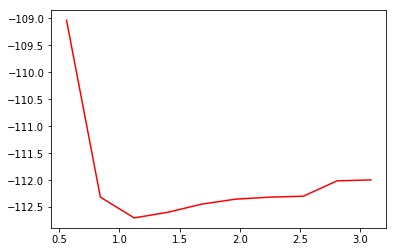

In [14]:
r_array = np.zeros(10)
E_array = np.zeros(10)
for i in range(0,10):
    r_array[i] = 0.5615 + i*0.2807

print(r_array)
E_array[0] = -109.0350050004
E_array[1] = -112.3137052599
E_array[2] = -112.6994904875
E_array[3] = -112.5943503269
E_array[4] = -112.4432190905
E_array[5] = -112.3517396124
E_array[6] = -112.3147098978
E_array[7] = -112.2973399066
E_array[8] = -112.0120671242
E_array[9] = -111.9948057317

plt.plot(r_array, E_array, 'red')
plt.show()

This is the raw data... we will interpolate this data using splines.

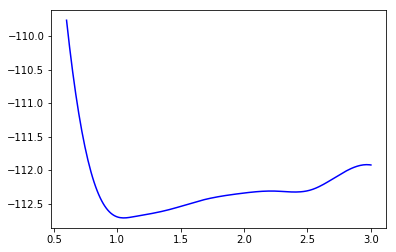

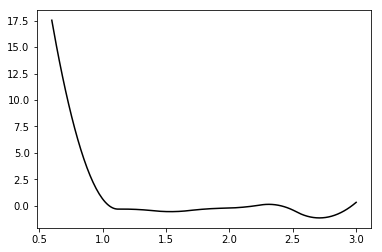

In [15]:
### use linear interpolation/extrapolation
order = 3
### form the interpolator/extrapolator object for datn
sE = InterpolatedUnivariateSpline(r_array, E_array, k=order)
### form a much finer grid
r_fine = np.linspace(0.6,3.0,200)
### compute the interpolated/extrapolated values for E on this grid
E_fine = sE(r_fine)
### plot the interpolated data
plt.plot(r_fine, E_fine, 'blue')
plt.show()

### take the derivative to get forces
fE = sE.derivative()
F_fine = -1*fE(r_fine)
### plot the forces
plt.plot(r_fine, F_fine, 'black')
plt.show()

And the calling sequence for $dfdx$ to compute the second derivative of a trial wavefunction we defined previously will look like this: